# Classification algorithm for cardiovascular disease

In [1]:
import pandas as pd
import numpy as np

In [2]:
url: str = "../dataset/heart_disease_uci.csv"
data = pd.read_csv(url)

In [3]:
data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Shape of the dataset (rows, columns)
data.shape

(920, 16)

In [6]:
# Check for duplicate rows
data.duplicated().sum()

0

In [7]:
# number of unique values in non-int64 or non-float64 columns
data.select_dtypes(exclude=['float64', 'int64']).nunique()

sex        2
dataset    4
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       3
dtype: int64

In [8]:
data.rename(columns={'cp': 'chestPainType', 'dataset': 'source', 'fbs': 'fastingBS', 'thalch': 'maxHR',
                     'chol': 'cholesterol', 'exang': 'exAngina', 'restecg': 'restECG',
                    'trestbps': 'restingBP', 'ca': 'angiography', 'num': 'heartDisease'}, inplace=True)
data.sample(5)

,id,age,sex,source,chestPainType,restingBP,cholesterol,fastingBS,restECG,maxHR,exAngina,oldpeak,slope,angiography,thal,heartDisease
416,417,50,Male,Hungary,atypical angina,170.0,209.0,False,st-t abnormality,116.0,False,0.0,NaN,NaN,NaN,0
647,648,54,Male,Switzerland,asymptomatic,180.0,0.0,NaN,normal,150.0,False,1.5,flat,NaN,reversable defect,1
333,334,39,Female,Hungary,non-anginal,110.0,182.0,False,st-t abnormality,180.0,False,0.0,NaN,NaN,NaN,0
408,409,49,Male,Hungary,atypical angina,100.0,253.0,False,normal,174.0,False,0.0,NaN,NaN,NaN,0
118,119,63,Male,Cleveland,asymptomatic,130.0,330.0,True,lv hypertrophy,132.0,True,1.8,upsloping,3.0,reversable defect,3


In [9]:
# numer of missing values in each columns
# missing_data = data.isna().sum()
# missing_data[:]

def calc_missing(df):
    obs = df.shape[0]
    r = []
    for col in df.columns:
        m = df[col].isna().sum()
        r.append([f'{col}',f'{m}', f'{(m/obs) * 100 :.2f}%'])
    return pd.DataFrame(r, columns=['Columns', 'No of missing', '% of missing'])

In [10]:
print(calc_missing(data))

          Columns No of missing % of missing
0              id             0        0.00%
1             age             0        0.00%
2             sex             0        0.00%
3          source             0        0.00%
4   chestPainType             0        0.00%
5       restingBP            59        6.41%
6     cholesterol            30        3.26%
7       fastingBS            90        9.78%
8         restECG             2        0.22%
9           maxHR            55        5.98%
10       exAngina            55        5.98%
11        oldpeak            62        6.74%
12          slope           309       33.59%
13    angiography           611       66.41%
14           thal           486       52.83%
15   heartDisease             0        0.00%


Remove any variable with over 50% missing data.

In [11]:
data.drop(columns=['angiography', 'thal', 'id', 'source'], inplace=True)
data.head(5)

,age,sex,chestPainType,restingBP,cholesterol,fastingBS,restECG,maxHR,exAngina,oldpeak,slope,heartDisease
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [12]:
from missingno import matrix

In [15]:
# Descriptive statistics
data.describe()

,age,restingBP,cholesterol,maxHR,oldpeak,heartDisease
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,132.402174,201.026087,136.648913,0.896957,0.995652
std,9.424685,18.965153,110.746323,25.889604,1.097267,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,119.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,139.500000,0.500000,1.000000
75%,60.000000,142.000000,268.250000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [16]:
# convert all non-zero cases to 1, to convert to binary classification
data['heartDisease'].replace(to_replace=[1,2,3,4], value=1, inplace=True)

In [17]:
data['heartDisease'].value_counts()

heartDisease
1    509
0    411
Name: count, dtype: int64

In [18]:
# data.drop()

In [19]:
anomaly = data.loc[data['restingBP'] == 0].index
data.drop(index=anomaly, inplace=True)

# data[data['restingBP'] == 0]

Having a resting blooad pressure of zero is an anomaly with a high likelihood of impossibility. So, i pruned the dataset of a case of its occurence.

In [20]:
# EDA with Viz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

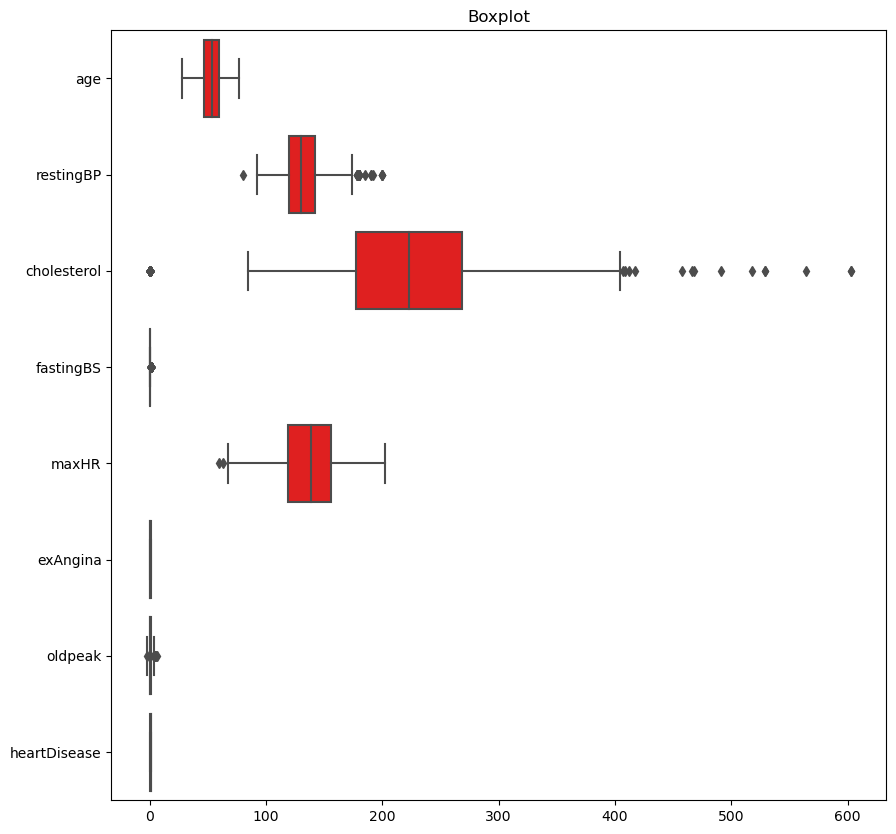

In [21]:
plt.figure(figsize=(10, 10))
sns.boxplot(data, color="red", orient="h")
# plt.boxplot(data)

plt.title("Boxplot before winsorization")
plt.show()

In [22]:
from scipy.stats.mstats import winsorize

In [23]:
# Winsorize dataset to handle extreme outliers
columns = ['oldpeak', 'maxHR', 'restingBP', 'fastingBS', 'cholesterol']
for column in columns:
    winsorize(data[column], limits=[0.05, 0.05], inplace=True)

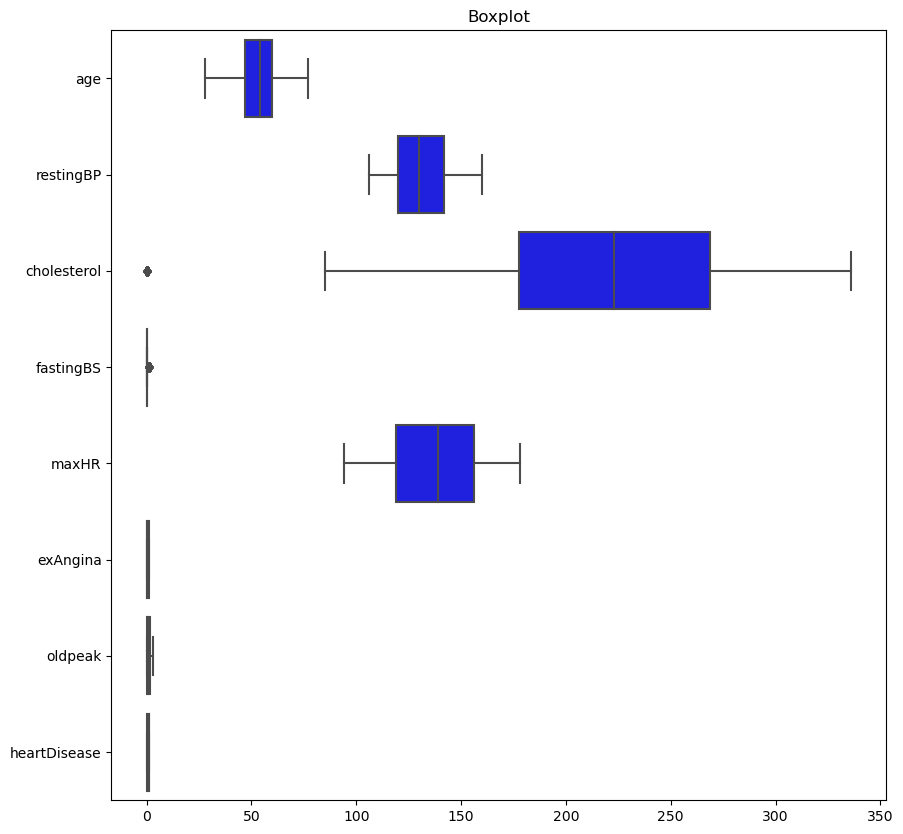

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(data, color="blue", orient="h")
# plt.boxplot(data)

plt.title("Boxplot after winsorization")
plt.show()

In [25]:
# Descriptive statistics after handling outlier
data.describe()

,age,restingBP,cholesterol,maxHR,oldpeak,heartDisease
count,919.000000,919.000000,919.000000,919.000000,919.000000,919.000000
mean,53.509249,131.992383,198.118607,136.891186,0.879434,0.552775
std,9.429689,15.993086,104.472782,24.304153,0.993597,0.497478
min,28.000000,106.000000,0.000000,94.000000,0.000000,0.000000
25%,47.000000,120.000000,177.500000,119.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,139.000000,0.500000,1.000000
75%,60.000000,142.000000,268.500000,156.000000,1.500000,1.000000
max,77.000000,160.000000,336.000000,178.000000,3.000000,1.000000


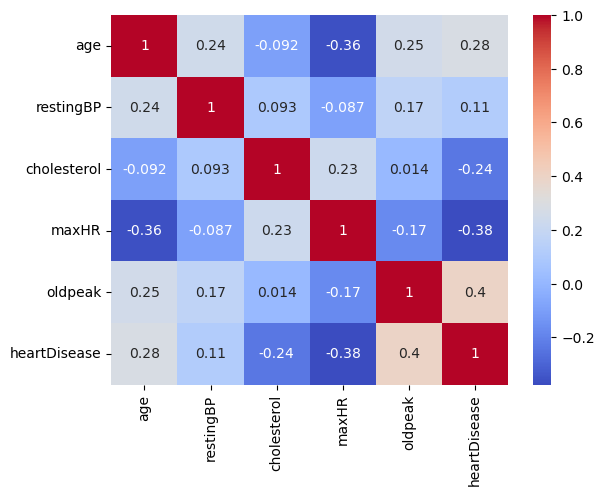

In [26]:
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap of numerical variables')
plt.show()

In [27]:
encodedData = pd.get_dummies(data, drop_first=True)
encodedData.sample(5)

,age,restingBP,cholesterol,fastingBS,maxHR,exAngina,oldpeak,heartDisease,sex_Male,chestPainType_atypical angina,chestPainType_non-anginal,chestPainType_typical angina,restECG_normal,restECG_st-t abnormality,slope_flat,slope_upsloping
750,54,120.0,0.0,False,120.0,True,1.5,1,True,False,False,False,False,True,True,False
868,57,144.0,270.0,True,160.0,True,2.0,1,True,False,False,False,False,True,True,False
407,49,130.0,207.0,False,135.0,False,0.0,0,False,False,True,False,False,True,True,False
755,64,144.0,0.0,False,122.0,True,1.0,1,True,False,False,False,False,True,True,False
549,55,140.0,268.0,False,128.0,True,1.5,1,True,False,False,False,True,False,True,False


In [28]:
encodedData.replace({True: 1, False: 0}, inplace=True)
encodedData.sample(5)

,age,restingBP,cholesterol,fastingBS,maxHR,exAngina,oldpeak,heartDisease,sex_Male,chestPainType_atypical angina,chestPainType_non-anginal,chestPainType_typical angina,restECG_normal,restECG_st-t abnormality,slope_flat,slope_upsloping
165,57,132.0,207.0,0,168.0,1,0.0,0,1,0,0,0,1,0,0,1
622,50,160.0,0.0,0,110.0,0,0.0,1,0,0,0,0,1,0,1,0
742,63,130.0,0.0,0,111.0,1,0.0,1,1,0,1,0,0,1,1,0
478,58,130.0,251.0,0,110.0,0,0.0,0,1,1,0,0,1,0,1,0
611,43,106.0,0.0,0,122.0,0,1.5,1,1,0,0,0,1,0,0,0


### Modelling

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
from sklearn.decomposition import PCA

In [30]:
# Split the data
x = encodedData.drop(columns=['heartDisease']).to_numpy().reshape(-1, encodedData.shape[1]-1)
y = encodedData['heartDisease'].to_numpy()
print(f'x-shape: {x.shape} \ny-shape: {y.shape}')

x-shape: (919, 15) 
y-shape: (919,)


In [31]:
# Scale data
scaler = MinMaxScaler()

In [32]:
x = scaler.fit_transform(x)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [34]:
# Reduce dimension using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

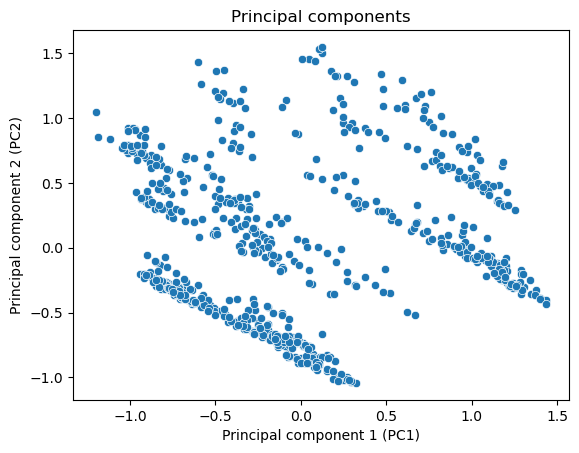

In [41]:
df_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
sns.scatterplot(df_pca, x='PC1', y='PC2')
plt.title('Principal components')
plt.xlabel('Principal component 1 (PC1)')
plt.ylabel('Principal component 2 (PC2)')
plt.show()

In [35]:
# Build a model
model = LogisticRegression()

In [36]:
model.fit(x_pca, y_train)

LogisticRegression()

In [37]:
test_pca = pca.transform(x_test)
y_pred = model.predict(test_pca)

### Model testing

In [38]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat
# TN, FP, FN, TP

array([[48, 27],
       [24, 85]])

In [39]:
print(f'Precision: {round(precision_score(y_test, y_pred), 2)}')
print(f'Recall: {round(recall_score(y_test, y_pred), 2)}')
print(f'F1 - score: {round(f1_score(y_test, y_pred), 2)}')

Precision: 0.76
Recall: 0.78
F1 - score: 0.77


### Report